In [31]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [121]:
heart_failure = pd.read_csv("data/heart_failure_clinical_records_dataset.csv",sep=',')
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# ANALISI

In [4]:
heart_failure.shape # rows are number of instances

(299, 13)

In [8]:
heart_failure.isna().any().any() # missing values ?

False

In [9]:
heart_failure['DEATH_EVENT'].value_counts() # balanced dataset?

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: ylabel='Frequency'>

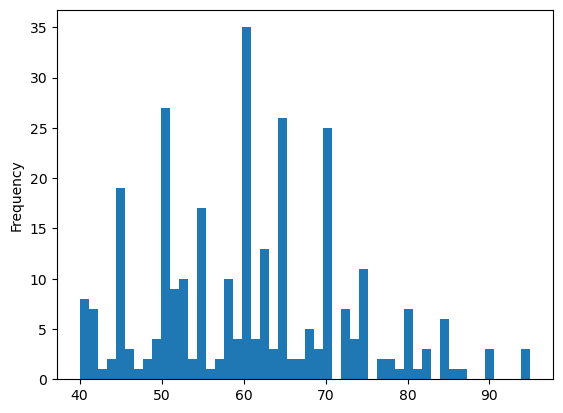

In [44]:
heart_failure["age"].plot.hist(bins=50) # uniform distribuited per age ?

In [47]:
# 2. Verificare se è vero che ci sono meno decessi tra le donne (sex = 0). Rappresentare graficamente se possibile quanto emerge dai dati
failure = heart_failure[heart_failure["DEATH_EVENT"] == 1]
failure.groupby("sex").size() / heart_failure.groupby("sex").size()


sex
0    0.323810
1    0.319588
dtype: float64

<Axes: xlabel='sex'>

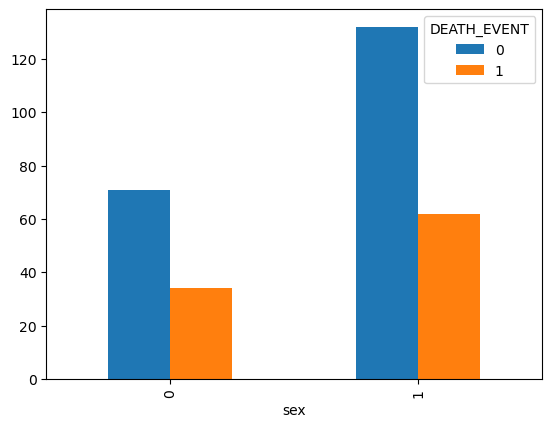

In [53]:
pd.pivot_table(heart_failure,'age', index="sex",columns="DEATH_EVENT", aggfunc='count').plot.bar()

In [55]:
""" 3. Realizzare una pivot_table in cui rappresentare la percentuale di decessi considerando la
variabile age (sulle righe e suddivisa in 5 gruppi), la variabile sex e la variabile smoking
(entrambe sulle colonne) (punti 3) """
categories = pd.cut(heart_failure['age'], bins=5)
categories
pd.pivot_table(heart_failure, 'DEATH_EVENT', index=[categories], columns=['sex','smoking'])


sex                    0              1          
smoking                0    1         0         1
age                                              
(39.945, 51.0]  0.258065  1.0  0.346154  0.100000
(51.0, 62.0]    0.333333  1.0  0.218750  0.250000
(62.0, 73.0]    0.250000  0.5  0.260870  0.357143
(73.0, 84.0]    0.750000  NaN  0.571429  0.444444
(84.0, 95.0]    0.500000  NaN  0.714286  1.000000

In [69]:
""" 4. Verificare se è vero che generalmente le persone anemiche (anaemia==true) sono anche
diabetiche (diabetes == true)"""
heart_failure[(heart_failure["diabetes"] == True) & (heart_failure["anaemia"] == True)].shape[0] >= heart_failure[(heart_failure["diabetes"] == False) & (heart_failure["anaemia"] == True)].shape[0]

# False means that is not true

False

<Axes: ylabel='Frequency'>

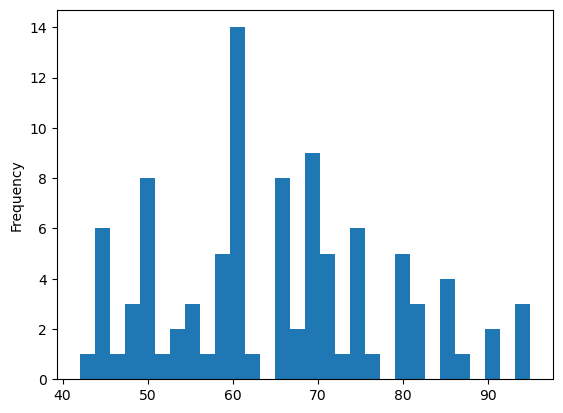

In [72]:
""" 5. La frequenza dei decessi è uniforme nelle età considerate nel dataset? Mostrare l’analisi
attraverso un opportuno grafico"""

heart_failure[heart_failure["DEATH_EVENT"] == 1]["age"].plot.hist(bins=30) 

In [ ]:
# TRASFORMAZIONE E PREDIZIONE

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [74]:
y = heart_failure["DEATH_EVENT"]
X = heart_failure.loc[:,"age":"time"] 
# I remove the target from the dataset to train the model


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

Accuracy with decision tree:
accuracy on train: 1.0
accuracy on test: 0.7676767676767676


<Axes: >

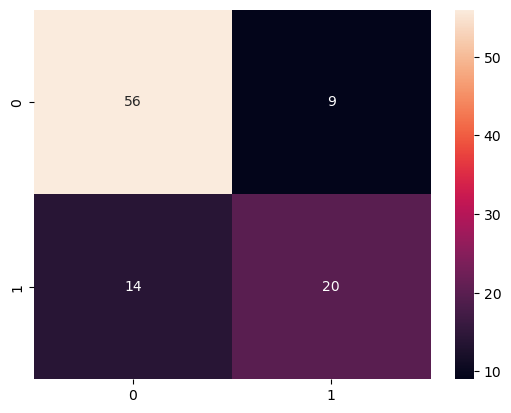

In [84]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

result = dt.predict(X_test)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result )}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

Accuracy with logistic regression:
accuracy on train: 0.79
accuracy on test: 0.8181818181818182


/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

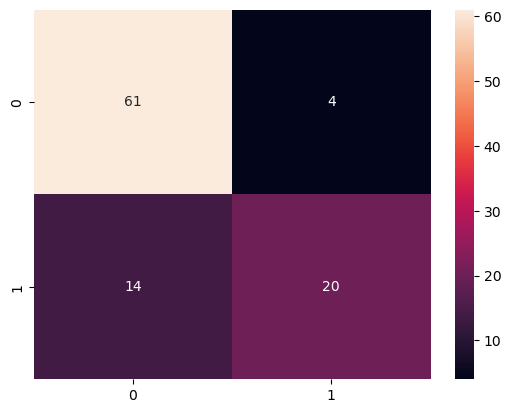

In [85]:
# Decision tree
lr = LogisticRegression()
lr.fit(X_train, y_train)

result = lr.predict(X_test)
print("Accuracy with logistic regression:")
print(f'accuracy on train: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result )}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

Accuracy with Dummy Classifier:
accuracy on train: 0.69
accuracy on test: 0.6565656565656566


<Axes: >

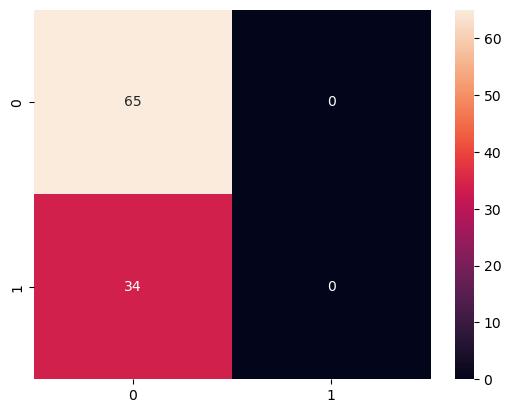

In [86]:
# Decision tree
dclf = DummyClassifier()
dclf.fit(X_train, y_train)

result = dclf.predict(X_test)
print("Accuracy with Dummy Classifier:")
print(f'accuracy on train: {accuracy_score(y_train, dclf.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result )}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [ ]:
"""2. Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con una 5 Fold cross validation"""

In [92]:
print(f'Average accuracy on decision tree: {cross_val_score(dt, X, y, cv=5).mean()}')
print(f'Average accuracy on logistic regression: {cross_val_score(lr, X, y, cv=5).mean()}')

Average accuracy on decision tree: 0.6321468926553673
Average accuracy on logistic regression: 0.7789265536723164


/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

In [ ]:
"""3. Considerare il dataset originale, eliminare l’attributo time, scalare il valore degli attributi a
un intervallo (0,1) e allenare sui dati un modello di LinearRegression (https://scikit-
learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear
_model.LinearRegression). Analizzare poi i coefficienti del modello e individuare i 5 attributi che
in valore assoluto hanno il valore più elevato. Costruire un nuovo dataset composto unicamente
di quei 5 attributi, e usare la tecnica 5 Fold cross validation per valutare se l’accuratezza del
modello Decision Tree migliora. (punti 5)"""

In [123]:
heart_failure = heart_failure.drop(columns=["time"])
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [127]:
y = heart_failure["DEATH_EVENT"]
X = heart_failure.loc[:,"age":"smoking"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [128]:

min_max_scaler = preprocessing.MinMaxScaler((0,1)) # default [0,1]

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [141]:
linr = LinearRegression()
linr.fit(X_train, y_train)
coe = abs(linr.coef_)
coe = np.sort(coe)
coe

array([0.02029462, 0.02673104, 0.05247792, 0.05403765, 0.06023827,
       0.06470845, 0.30717502, 0.50445099, 0.5568719 , 0.58012623,
       0.85538882])

In [143]:
coe[-5:]

array([0.30717502, 0.50445099, 0.5568719 , 0.58012623, 0.85538882])

In [146]:
best_coefficient = []
print("I valori più alti dei coefficienti sono:")
for value in coe[-5:]:
  indice = np.where(coe == value)[0][0]
  print(str(value) + "\tindice: " + str(indice) + "\tattributo: " + X.columns[indice])
  best_coefficient.append(X.columns[indice])

best_coefficient

I valori più alti dei coefficienti sono:
0.3071750236902725	indice: 6	attributo: platelets
0.5044509894790191	indice: 7	attributo: serum_creatinine
0.5568718953529631	indice: 8	attributo: serum_sodium
0.5801262264088158	indice: 9	attributo: sex
0.8553888162453738	indice: 10	attributo: smoking


['platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

In [148]:
new_healt_failure = pd.DataFrame()
for coefficient in best_coefficient:
    new_healt_failure[coefficient] = X[coefficient]

new_healt_failure

,platelets,serum_creatinine,serum_sodium,sex,smoking
0,265000.00,1.9,130,1,0
1,263358.03,1.1,136,1,0
2,162000.00,1.3,129,1,1
3,210000.00,1.9,137,1,0
4,327000.00,2.7,116,0,0
...,...,...,...,...,...
294,155000.00,1.1,143,1,1
295,270000.00,1.2,139,0,0
296,742000.00,0.8,138,0,0
297,140000.00,1.4,140,1,1


In [149]:
dt = DecisionTreeClassifier()

scores = cross_val_score(dt, new_healt_failure, y, cv = 5)
print(scores)
scores.mean()

[0.56666667 0.56666667 0.58333333 0.65       0.6779661 ]


0.6089265536723164

In [ ]:
"""Considerare il dataset originale, eliminare l’attributo time, e creare una pipeline in cui il
valore degli attributi age e platelets sia discretizzato in 6 intervalli e gli attributi non booleani
vengano ricondotti a valori nell’intervallo (0,1) e normalizzati con la funzione Normalizer. Si
applichi poi un modello DecisionTree e si valuti l’accuratezza. (punti 4)"""

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [151]:
heart_failure = pd.read_csv("data/heart_failure_clinical_records_dataset.csv",sep=',')
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [152]:
heart_failure = heart_failure.drop(columns=["time"])
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [155]:
preprocessor_pipeline = ColumnTransformer(
    transformers=[
        ('discretation', preprocessing.KBinsDiscretizer(n_bins=6), ['age','platelets']),
        ('scaler', preprocessing.MinMaxScaler(), ['creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'serum_sodium']  ),
        ('normalization', preprocessing.Normalizer(), ['creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'serum_sodium']  ),
    ], remainder ='passthrough')

In [156]:
model_pipeline = DecisionTreeClassifier()

In [157]:
my_pipeline = Pipeline(steps=[('preprocessing', preprocessor_pipeline),
                                ('model', model_pipeline)
                             ], verbose = True)
my_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretation',
                                                  KBinsDiscretizer(n_bins=6),
                                                  ['age', 'platelets']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('normalization', Normalizer(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium'])])),
                ('model', DecisionTreeClassifier())],
         verbose=True)

In [158]:
y = heart_failure["DEATH_EVENT"]
X = heart_failure.loc[:,"age":"smoking"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [159]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


0.67

In [ ]:
"""5. Applicare una funzione per l’ottimizzazione dei parametri (sia del modello di classificazione
sia della pipeline) e verificare se l’accuratezza migliora."""

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
parameters = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [5, 7, 10],
    'preprocessing__discretation__n_bins': [4, 6, 8, 10],
    'preprocessing__discretation__strategy': ['uniform','quantile'],
}

clf = GridSearchCV(my_pipeline, parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipel

/usr/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('discretation',
                                                                         KBinsDiscretizer(n_bins=6),
                                                                         ['age',
                                                                          'platelets']),
                                                                        ('scaler',
                                                                         MinMaxScaler(),
                                                                         ['creatinine_phosphokinase',
                                                                          'ejection_fraction',
                                                                          'serum_creatinine',
                                                                          'serum_sodium']),
                                                                        ('normalization',
                                                                         Normalizer(),
                                                                         ['creatinine_phosphokinase',
                                                                          'ejection_fraction',
                                                                          'serum_creatinine',
                                                                          'serum_sodium'])])),
                                       ('model', DecisionTreeClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 7, 10],
                         'preprocessing__discretation__n_bins': [4, 6, 8, 10],
                         'preprocessing__discretation__strategy': ['uniform',
                                                                   'quantile']})

In [164]:
clf.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'preprocessing__discretation__n_bins': 8,
 'preprocessing__discretation__strategy': 'quantile'}

In [167]:
my_pipeline.set_params(**clf.best_params_)

/usr/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretation',
                                                  KBinsDiscretizer(n_bins=8),
                                                  ['age', 'platelets']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('normalization', Normalizer(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium'])])),
                ('model', DecisionTreeClassifier(max_depth=5))],
         verbose=True)

In [168]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


0.65

In [ ]:
""" Creare una pipeline che aggiunga alle features della pipeline del punto 4, le feature che
derivano dalla applicazione di una PCA (https://scikit-
learn.org/stable/modules/generated/sklearn.decomposition.PCA.html mantenendo due
dimensioni) e le feature che derivano dalla applicazione della funzione SelectKBest
(https://scikit-
learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selec
tkbest#sklearn.feature_selection.SelectKBest scegliendo K=2)."""

In [181]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion, FunctionTransformer

In [171]:
preprocessor_pipeline = ColumnTransformer(
    transformers=[
        ('discretation', preprocessing.KBinsDiscretizer(n_bins=6), ['age','platelets']),
        ('scaler', preprocessing.MinMaxScaler(), ['creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'serum_sodium']  ),
        ('normalization', preprocessing.Normalizer(), ['creatinine_phosphokinase','ejection_fraction', 'serum_creatinine', 'serum_sodium']  ),
    ], remainder ='passthrough')

In [182]:
def identity_func(X):
  return X

combined_features = FeatureUnion([("pca", PCA(n_components=2)), ("select", SelectKBest(k=2)), ('passthrough', FunctionTransformer(identity_func,validate=False))])

In [183]:
model_pipeline = DecisionTreeClassifier()
my_pipeline = Pipeline(steps=[('preprocess', preprocessor_pipeline),
                              ('transform', combined_features),
                                ('model', model_pipeline)
                             ], verbose = True)
my_pipeline

/usr/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretation',
                                                  KBinsDiscretizer(n_bins=6),
                                                  ['age', 'platelets']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('normalization', Normalizer(),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'serum_creatinine',
                                                   'serum_sodium'])])),
                ('transform',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=2)),
                                                ('select', SelectKBest(k=2)),
                                                ('passthrough',
                                                 FunctionTransformer(func=<function identity_func at 0x74babe93e520>))])),
                ('model', DecisionTreeClassifier())],
         verbose=True)

In [188]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

[Pipeline] ........ (step 1 of 3) Processing preprocess, total=   0.0s
[Pipeline] ......... (step 2 of 3) Processing transform, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.0s


0.65